### Homework 2.1.1 - 1D Wave

Solve the wave equation

$$\frac{{{\partial ^2}u}}{{\partial {t^2}}} = c^2 \frac{{{\partial ^2}u}}{{\partial {x^2}}}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)** and **the frequency ($\omega$)** to make a nice time-animated graph video clip.

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

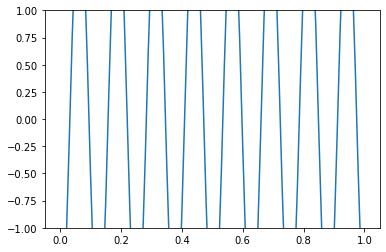

In [7]:
# Set up an array of ux0
size = 100
L = 1
x = np.linspace(0, L, size+1, endpoint=True)
Ux0 = 0*x

# ensuring both ends are fixed at zero
Ux0[0] = 0
Ux0[size] = 0

Uold = Ux0
# Set up initial condition for the time derivative at t = 0
dUx0 = np.zeros(size+1)

#omega <--- frequency of the wave, if high = barcode plot
w = 0.5

#from finite equation
dt = 0.01 # Set up time step size
dh = L / size # Spatial step size
c = 1 # Speed of wave
eps = ((dt*c/dh)**2) #epsilon

# keep this
# Calculate time step j = 1
Uxj = np.zeros(size+1)
for i in np.linspace(1, 99, 99, dtype=int):
    Uxj[i] = 0.5*eps*(Ux0[i+1] + Ux0[i-1]) + (1. - eps)*(Ux0[i]) + dt * dUx0[i]

UAll = np.array([Uxj])
fig1 = plt.figure()
l = plt.plot(x, Uxj)
axes = plt.gca()
axes.set_ylim([-1,1])

for j in range(200):
    Unew = np.zeros(size+1)
    Unew[0] = 2*np.sin(w*j) #feeding wave conditions, x= 0
#     Unew[size] = 0 #open condition where x = L
    Unew[size] = Uxj[100] - c *(Uxj[100] - Uxj[100-1]) #this is open condition where x = L, credit philippe
    for i in np.linspace(1, 99, 99, dtype=int):
        Unew[i] = eps*(Uxj[i+1] + Uxj[i-1]) + 2.*(1. - eps)*Uxj[i] - Uold[i]
    Uold = Uxj
    Uxj = Unew
    UAll = np.vstack([UAll, Unew]) #make it 2d-array
    #if j > 30:
    #    plt.plot(x, Unew)
    
    
    #Uxj = u, changing i
    #Unew = u_i,j+1

        
def update_line(num, line):
    line.set_data(x, UAll[num])
    return line,
        
line_ani = animation.FuncAnimation(fig1, update_line, 200, fargs=(l), interval=20, blit=True)
writergif = animation.PillowWriter(fps=30)
line_ani.save('1DWave.gif',writer=writergif)
plt.show()

___
### Homework 2.1.2 - 1D Wave with damping

Solve the wave equation

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} - k \frac{\partial u}{\partial t}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)**, **the frequency ($\omega$)**, and **the damping factor ($k$)** to make a nice time-animated graph video clip.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

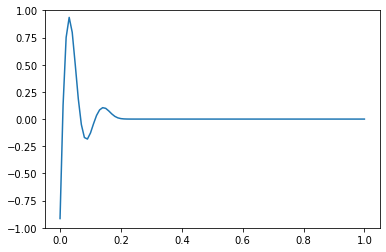

In [31]:
# Set up an array of ux0
size = 100
L = 1
x = np.linspace(0, L, size+1, endpoint=True)
Ux0 = 0*x

# ensuring both ends are fixed at zero
Ux0[0] = 0
Ux0[size] = 0

Uold = Ux0
# Set up initial condition for the time derivative at t = 0
dUx0 = np.zeros(size+1)

#omega <--- frequency of the wave, if high = barcode plot
w = 0.05
k = 5 #damping factor

#from finite equation
dt = 0.01 # Set up time step size
dh = L / size # Spatial step size
c = 0.1 # Speed of wave
eps = ((dt*c/dh)**2) #epsilon

# keep this
# Calculate time step j = 1
Uxj = np.zeros(size+1)
for i in np.linspace(1, 99, 99, dtype=int):
    Uxj[i] = 0.5*eps*(Ux0[i+1] + Ux0[i-1]) + (1. - eps)*(Ux0[i]) + dt * dUx0[i]

UAll = np.array([Uxj])
fig1 = plt.figure()
l = plt.plot(x, Uxj)
axes = plt.gca()
axes.set_ylim([-1,1])

for j in range(200):
    Unew = np.zeros(size+1)
    Unew[0] = 2*np.sin(w*j) #feeding wave conditions, x= 0
#     Unew[size] = 0 #open condition where x = L
    Unew[size] = Uxj[100] - c *(Uxj[100] - Uxj[100-1]) #this is open condition where x = L, credit philippe
    for i in np.linspace(1, 99, 99, dtype=int):
        a = 2*eps*(Uxj[i+1] - 2*Uxj[i] + Uxj[i-1])
        b = (4*Uxj[i] - Uold[i]*(2-dt*k))
        Unew[i] = (a+b)/(2+dt*k)
    Uold = Uxj
    Uxj = Unew
    UAll = np.vstack([UAll, Unew]) #make it 2d-array

    
    #Uxj = u, changing i
    #Unew = u_i,j+1

        
def update_line(num, line):
    line.set_data(x, UAll[num])
    return line,
        
line_ani = animation.FuncAnimation(fig1, update_line, 200, fargs=(l), interval=20, blit=True)
writergif = animation.PillowWriter(fps=30)
line_ani.save('1DWave_damping.gif',writer=writergif)
plt.show()